In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 1d

In [ ]:
class SGD:
    def __init__(self,I,x_lim,a_lim,x=None,a=None,eta=1):
        self.I=I
        self.x_lim=x_lim
        self.a_lim=a_lim
        self.eta=eta
        self.i_range=np.arange(7)-3
        self.x=initialize_params([x_lim]) if x is None else x
        self.a=initialize_params([a_lim]) if a is None else a
        # self.x,self.a=initialize_params(np.array([x_lim,a_lim]))
        self.I_1=diff(I)
    


    def generate_x_i(self):
        return np.round(self.i_range*self.a+self.x).astype(int)
    def loss(self):
        x_i=self.generate_x_i()
        
        return np.sum(self.I[x_i])

    def grad(self):
        x_i=self.generate_x_i()
        loss_a=np.sum(self.I_1[x_i]*self.i_range)
        loss_x=np.sum(self.I_1[x_i])
        return np.array([loss_x,loss_a])
    def fit(self):
        loss_prev=0
        loss_new=self.loss()
        while np.abs(loss_new-loss_prev)>1e-5:
            gradient=self.grad()
            self.x,self.a=np.r_[self.x,self.a]+self.eta*gradient
            loss_prev=loss_new
            loss_new=self.loss()
        print(loss_new)

def initialize_params(lim):
    return [int(np.round(np.random.uniform(low=l[0],high=l[1]))) for l in lim]
def diff(I):
    return I[1:]-I[:-1]


In [ ]:
def generate_int(Q,r):
    return np.cos(Q*r)+.5*np.cos(2.1*Q*r)

In [ ]:
x=np.linspace(-20,20,1001)
y=generate_int(np.array([1]), x)

In [ ]:
plt.plot(y)
plt.axvline(x=500)
plt.axvline(x=650)

In [ ]:
x_lim=[485,515]
a_lim=[145,155]
sgd=SGD(y, x_lim, a_lim,x=500)
sgd.fit()

In [ ]:
fig,ax=plt.subplots()
ax.plot(y)
ax.scatter(sgd.generate_x_i(),y[sgd.generate_x_i()],color='r')

# 2d

In [ ]:
import h5py
import matplotlib.colors as colors


In [ ]:
workingdir='/home/shared/STEM_sample_2/'
f=h5py.File(workingdir+'data.hdf5','r')
I,T=f['I'],f['T']


In [ ]:
# x,y=190,5
x,y=65,65
T_idx=0
data=I[T_idx,x,y,:,:]

In [ ]:
fig,ax=plt.subplots(figsize=(4,4),tight_layout=True)


# vmin,vmax=max(I[:,x,y].min(),1),I[:,x,y].max()
# vmin,vmax=data.min(),data.max()
# im=ax.imshow(data*mask,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax))
mask_Bragg=np.where(com.generate_mask()==1,1,np.nan)
im=ax.imshow(np.log10(data+1)*mask_Bragg,cmap='gray',)
axins=ax.inset_axes([1.05,0,.07,1],transform=ax.transAxes)
tit=ax.set_title('T={:d} K'.format(T[T_idx]+273))
cb=plt.colorbar(im,cax=axins)
cb.ax.set_title(r'$ I(k_x,k_y) $')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
# ax.axvline(x=80,color='b',ls='dashed')
# ax.axvline(x=86,color='b',ls='dashed')
# ax.axhline(y=50,color='y',ls='dashed')
# ax.axhline(y=55,color='y',ls='dashed')

# ax.axvline(x=63,color='b',ls='dashed')
# ax.axvline(x=68,color='b',ls='dashed')
# ax.axhline(y=26,color='y',ls='dashed')
# ax.axhline(y=31,color='y',ls='dashed')

# ax.axvline(x=50,color='b',ls='dashed')
# ax.axvline(x=58,color='b',ls='dashed')
# ax.axhline(y=50,color='y',ls='dashed')
# ax.axhline(y=58,color='y',ls='dashed')
# x_i=sgd_2d.generate_x_i()

# x_i=com.generate_x_i()
# ax.scatter(x_i[:,1],x_i[:,0],color='b',s=2)
com=COM(data=data)
com_i=com.generate_com()
ax.scatter(com_i[:,1],com_i[:,0],color='r',s=2)
# for idx,xy in enumerate(com_i):
#     x,y=xy
#     ax.text(y,x,str(idx))

In [ ]:
for idx,xy in com_i:
    print(xy)

In [ ]:
g1=sgd_2d.b1-sgd_2d.k

In [ ]:
g2=sgd_2d.b2-sgd_2d.k

In [ ]:
np.linalg.norm(g1),np.linalg.norm(g2)

In [ ]:
g1@g2/(np.linalg.norm(g1)*np.linalg.norm(g2))

In [ ]:
sgd_2d.k_lim

In [ ]:
class SGD_2D:
    def __init__(self,I,k_lim,b1_lim,b2_lim,k=None,b1=None,b2=None,eta=1):
        '''
        I: input with linear scale, using log scale
        k: position of the center Bragg peak
        b1: reciprocal lattice vector pointing to the right
        b2: reciprocal lattice vector pointing to the top
        k_lim: [[kx_min,kx_max],[ky_min,ky_max]]
        b1_lim: [[b1x_min,b1x_max],[b1y_min,b1y_max]]
        b2_lim: [[b2x_min,b2x_max],[b2y_min,b2y_max]]
        '''
        self.I,self.k_lim,self.b1_lim,self.b2_lim,self.eta=np.log10(I),k_lim,b1_lim,b2_lim, eta
        # self.i_range=np.array([[-2,2],[-1,2],
        #                        [-2,1],[-1,1],[0,1],[1,1],
        #                        [-1,0],[0,0],[1,0],
        #                        [-1,-1],[0,-1],[1,-1],[2,-1],
        #                        [1,-2],[2,-2]])
        self.i_range=np.array([
                               [-1,1],[0,1],
                               [-1,0],[0,0],[1,0],
                               [0,-1],[1,-1]])
        self.k=np.array(initialize_params(k_lim)) if k is None else k
        self.b1=np.array(initialize_params(b1_lim)) if b1 is None else b1
        self.b2=np.array(initialize_params(b2_lim)) if b2 is None else b2
        # self.g1=self.b1-self.k
        # self.g2=self.b2-self.k
        self.I_1,self.I_2=np.gradient(self.I)
        # self.I_1=np.gradient(self.I,0)
        # self.I_2=np.gradient(self.I,1)
        # self.I_1=self.I[1:,:]-self.I[:-1,:]
        # self.I_2=self.I[:,1:]-self.I[:,:-1]
    def generate_x_i(self):
        # x_i=self.i_range@np.array([self.b1,self.b2])+self.k
        # i,j=self.i_range[:,0],self.i_range[:,1]
        x_i=self.i_range@np.array([self.b1-self.k,self.b2-self.k])+self.k
        # x_i[:,0]=np.where(x_i[:,0]>=self.I.shape[0],self.I.shape[0]-1,x_i[:,0])
        # x_i[:,1]=np.where(x_i[:,1]>=self.I.shape[1],self.I.shape[1]-1,x_i[:,1])
        return np.round(x_i).astype(int)
    def loss(self):
        x_i=self.generate_x_i()
        return np.sum([self.I[tuple(idx)] for idx in x_i])
    def grad(self):
        x_i=self.generate_x_i()
        I_1=[self.I_1[tuple(idx)] for idx in x_i]
        I_2=[self.I_2[tuple(idx)] for idx in x_i]
        i,j=self.i_range[:,0],self.i_range[:,1]
        grad_k_x=np.sum(I_1*(1-i-j))
        grad_k_y=np.sum(I_2*(1-i-j))
        grad_b1_x=np.sum(I_1*i)
        grad_b1_y=np.sum(I_2*i)
        grad_b2_x=np.sum(I_1*j)
        grad_b2_y=np.sum(I_2*j)
        return np.array([grad_k_x,grad_k_y,grad_b1_x,grad_b1_y,grad_b2_x,grad_b2_y])
    def fit(self,thres=1):
        loss_prev=0
        loss_new=self.loss()
        while np.abs(loss_new-loss_prev)>thres:
            gradient=self.grad()
            k_x,k_y,b1_x,b1_y,b2_x,b2_y=np.r_[self.k,self.b1,self.b2]+self.eta*gradient
            k_x=min(max(self.k_lim[0][0],k_x),self.k_lim[0][1])
            k_y=min(max(self.k_lim[1][0],k_y),self.k_lim[1][1])
            b1_x=min(max(self.b1_lim[0][0],b1_x),self.b1_lim[0][1])
            b1_y=min(max(self.b1_lim[1][0],b1_y),self.b1_lim[1][1])
            b2_x=min(max(self.b2_lim[0][0],b2_x),self.b2_lim[0][1])
            b2_y=min(max(self.b2_lim[1][0],b2_y),self.b2_lim[1][1])
            self.k=np.array([k_x,k_y])
            self.b1=np.array([b1_x,b1_y])
            self.b2=np.array([b2_x,b2_y])
            loss_prev=loss_new
            loss_new=self.loss()
            # print(loss_new)

def gradient(I,idx):
    if idx==0:
        return 

In [ ]:
data_log=np.log10(data)
plt.plot(data_log[1:,50]-data_log[:-1,50])
# plt.plot(np.gradient(data_log)[0][:,50])
# plt.plot(sgd_2d.I_1[:,50])

In [ ]:
sgd_2d=SGD_2D(I=data,k_lim=[[50,58],[50,58]], b1_lim=[[50,55],[80,86]], b2_lim=[[26,31],[63,68]],k=[54,54])

In [ ]:
(63+68)/2

In [ ]:
sgd_2d.b1,sgd_2d.b2

In [ ]:
sgd_2d.k

In [ ]:
k_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
b1_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
b2_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
for T_idx in range(1):
# for T_idx in range(I.shape[0]):
    for i in range(I.shape[1]):
        for j in range(I.shape[2]):
            print(i,j)
            sgd_2d=SGD_2D(I=I[T_idx,i,j],k_lim=[[50,58],[50,58]], b1_lim=[[50,55],[80,86]], b2_lim=[[26,31],[63,68]],k=[54,54])
            sgd_2d.fit()
            k_store[T_idx,i,j]=sgd_2d.k
            b1_store[T_idx,i,j]=sgd_2d.b1
            b2_store[T_idx,i,j]=sgd_2d.b2



In [ ]:
k_store.shape

In [ ]:
plt.imshow(k_store[0,:,:,0])

In [ ]:
plt.imshow(g1_norm[0])
plt.colorbar()

In [ ]:
plt.imshow(g2_norm[0])
plt.colorbar()

In [ ]:
g1_store=(b1_store-k_store)
g2_store=(b2_store-k_store)

In [ ]:
g1_norm=np.sqrt(g1_store[:,:,:,0]**2+g1_store[:,:,:,1]**2)

In [ ]:
g2_norm=np.sqrt(g2_store[:,:,:,0]**2+g2_store[:,:,:,1]**2)

In [ ]:
g1_norm[0]/g2_norm[0]

In [ ]:
sgd_2d.fit(thres=1e-2)

In [ ]:
1. out of bounds
2. derivative not smooth, high order may needed
3. restrict boundary when running

In [ ]:
sgd_2d.loss()

In [ ]:
np.r_[sgd_2d.k,sgd_2d.b1,sgd_2d.b2]

In [ ]:
sgd_2d.b1

# COM

In [7]:
import h5py
import matplotlib.colors as colors
from scipy import ndimage
import pickle

In [90]:
workingdir='/share/kim/STEM_sample_3/'
# workingdir='/share/kim/STEM_sample_2/'
# workingdir='/home/shared/STEM_sample_2/'
f=h5py.File(workingdir+'data.hdf5','r')
I,T=f['I'],f['T']


In [91]:
# x,y=190,5
x,y=65,65
T_idx=0
data=I[T_idx,x,y,:,:]
mask=np.full(data.shape[:2],True)
mask[:,85:]=False
# data[~mask]=np.nan

In [ ]:
%load_ext line_profiler

In [ ]:
%lprun -f foo.compute my_func()

UsageError: Could not find module foo.compute.
NameError: name 'foo' is not defined


In [89]:
%%writefile COM.py
import numpy as np
from scipy import ndimage
from sklearn.neighbors import NearestNeighbors
from collections import deque
import matplotlib.pyplot as plt
from matplotlib import colors
class COM:
    def __init__(self,data,k0=[54,54],k1=[51,83],k2=[28,65],
    i_range=np.array([[-2,2],[-1,2],[0,2],
                    [-2,1],[-1,1],[0,1],[1,1],
                    [-1,0],[0,0],[1,0],
                    [-1,-1],[0,-1],[1,-1],[2,-1],
                    [0,-2],[1,-2],[2,-2]]),crop=None):
        self.data=data
        self.k0=np.array(k0)
        self.k1=np.array(k1)
        self.k2=np.array(k2)
        self.i_range=i_range
        self.crop=np.full(data.shape, True) if crop is None else crop
        self.x_i=self.generate_x_i()
        # self.i_range=np.array([[-2,2],[-1,2],[0,2],
        #                        [-2,1],[-1,1],[0,1],[1,1],
        #                        [-1,0],[0,0],[1,0],
        #                        [-1,-1],[0,-1],[1,-1],[2,-1],
        #                        [0,-2],[1,-2],[2,-2]])
        self.lines=generate_lines(index_range=self.i_range,vectors=np.array([[1,0],[0,1],[-1,1]]))

    def generate_x_i(self):
        x_i=self.i_range@np.array([self.k1-self.k0,self.k2-self.k0])+self.k0
        x_i=np.round(x_i).astype(int)
        uncropped_pts=(self.crop[tuple(x_i.T)])
        self.i_range=self.i_range[uncropped_pts]
        return x_i[uncropped_pts]

    def generate_mask(self,radius=3):
        # if x_i is None:
        #     x_i=self.generate_x_i()
        mask=np.zeros(self.data.shape,dtype=int)
        x_i_all=[]
        for i in range(-radius,radius+1):
            for j in range(-radius,radius+1):
                x_i_all.append(self.x_i+np.array([i,j]))
        x_i_all=np.vstack(x_i_all)
        x_i_all[x_i_all<0]=0
        x_i_all[x_i_all[:,0]>=self.data.shape[0]]=self.data.shape[0]-1
        x_i_all[x_i_all[:,1]>=self.data.shape[1]]=self.data.shape[1]-1
        mask[tuple(x_i_all.T)]=1
        return mask
    def generate_mask_ordered(self,radius=3):
        mask=np.zeros(self.data.shape,dtype=int)
        for label_idx,x_i in enumerate(self.x_i):
            shift_i,shift_j=np.mgrid[-radius:radius+1,-radius:radius+1]
            shift_i,shift_j=x_i[0]+shift_i.flatten(),x_i[1]+shift_j.flatten()
            shift_i=np.maximum(0,shift_i)
            shift_i=np.minimum(self.data.shape[0],shift_i)
            shift_j=np.maximum(0,shift_j)
            shift_j=np.minimum(self.data.shape[1],shift_j)
            mask[shift_i,shift_j]=label_idx+1
        return mask,label_idx+1

    def generate_com(self):
        # mask=self.generate_mask()
        # lbl=ndimage.label(mask)
        lbl=self.generate_mask_ordered()
        return np.array(ndimage.center_of_mass(self.data,lbl[0],range(1,lbl[1]+1)))

    def visualize(self):
        com_ij=self.generate_com()
        fig,ax=plt.subplots(figsize=(6,6))
        vmin,vmax=np.nanmin(self.data),np.nanmax(self.data)
        im=ax.imshow(self.data,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax))
        ax.set_xlabel(r'$k_x$')
        ax.set_ylabel(r'$k_y$')
        ax.set_aspect('equal')

        ax.scatter(com_ij[:,1],com_ij[:,0],color='b',s=3)
        [ax.text(com_ij[idx,1],com_ij[idx,0],f'{idx}',color='b') for idx in range(com_ij.shape[0])]


    def average_dist(self):
        com_i=self.generate_com()
        nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(com_i)
        distances, indices = nbrs.kneighbors(com_i)
        return distances[:,1].mean()

def average_dist_direction(com_i,lines):
    dist={}
    ave_dist=[]
    for key,val in lines.items():
        dist[key]=[]
        for pts_idx in val:
            pts=com_i[pts_idx]
            dist[key].append(distance(pts))
    # return dist
    for key,val in dist.items():
        ave_distance=np.hstack(dist[key]).mean()
        ave_dist.append(ave_distance)
    return np.array(ave_dist)



def generate_lines(index_range, vectors):
    """
    Generate a list of lines for given vectors.

    Parameters
    ----------
    index_range : numpy.ndarray
        2D array containing the indices.
    vectors : numpy.ndarray
        Array of vectors along an orientation are to be generated.

    Returns
    -------
    dict
        A dictionary where each key corresponds to a vector orientation and each value is a list of lines.

    """
    lines={}
    for vector_idx in range(3):
        visited = [False] * index_range.shape[0]
        lines[vector_idx] = [extend(point_idx, vectors[vector_idx], index_range, visited) for point_idx in range(index_range.shape[0]) if not visited[point_idx]]
    return lines


def extend(start_point_idx, vector, index_range, visited):
    """
    Extend the line from the starting point in the direction of the vector.

    Parameters
    ----------
    start_point_idx : int
        Starting point index.
    vector : numpy.ndarray
        Vector to extend the line.
    index_range : numpy.ndarray
        2D array containing the indices.
    visited : list
        A list of boolean values indicating which indices have been visited.

    Returns
    -------
    collections.deque
        A deque containing indices of the extended line.

    """
    point_idx_list = deque([start_point_idx])
    visited[start_point_idx] = True
    for direction in [-1,1]:
        next_point = index_range[start_point_idx] + direction* vector
        idx = is_contained(next_point, index_range, visited)
        while idx is not None: 
            if direction == 1:
                point_idx_list.append(idx)
            else:
                point_idx_list.appendleft(idx)
            visited[idx] = True
            next_point = next_point + direction*vector
            idx = is_contained(next_point, index_range, visited)

    # next_point = index_range[start_point_idx] - vector
    # idx = is_contained(next_point, index_range, visited)
    # while idx != -1:
    #     point_idx_list.appendleft(idx)
    #     visited[idx] = True
    #     next_point = next_point - vector
    #     idx = is_contained(next_point, index_range, visited)

    return point_idx_list

def is_contained(point, index_range, visited):
    """
    Check whether a point is contained in the index range and not visited.

    Parameters
    ----------
    point : numpy.ndarray
        Point to be checked.
    index_range : numpy.ndarray
        2D array containing the indices.
    visited : list
        A list of boolean values indicating which indices have been visited.

    Returns
    -------
    int
        The index of the point if it is contained in the index range and not visited, else None.

    """
    idx = np.where((point == index_range).all(axis=1))[0]
    return idx[0] if idx.size > 0 and not visited[idx[0]] else None


def distance(x_i):
    return np.linalg.norm(x_i[:-1]-x_i[1:],axis=1)






Overwriting COM.py


In [92]:
com=COM(data=data)
com=COM(data=data,k0=[66,65],k1=[69,95],k2=[42,81],
i_range=np.array([[-3,2],[-2,2],[-1,2],[0,2],
                    [-2,1],[-1,1],[0,1],[1,1],
                    [-2,0],[-1,0],[0,0],[1,0],[2,0],
                    [-1,-1],[0,-1],[1,-1],[2,-1],
                    [-1,-2],[0,-2],[1,-2],[2,-2],[3,-2]]),
crop=mask)

In [93]:
com.lines

{0: [deque([0, 1, 2]),
  deque([3, 4, 5]),
  deque([6, 7, 8]),
  deque([9, 10, 11]),
  deque([12, 13, 14])],
 1: [deque([0]),
  deque([6, 3, 1]),
  deque([12, 9, 7, 4, 2]),
  deque([13, 10, 8, 5]),
  deque([14, 11])],
 2: [deque([14, 10, 7, 3, 0]),
  deque([11, 8, 4, 1]),
  deque([5, 2]),
  deque([13, 9, 6]),
  deque([12])]}

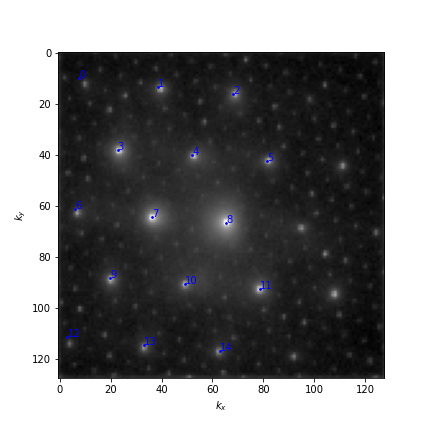

In [94]:
com.visualize()

In [71]:
com_ij=com.generate_com()
# com_ij=com.generate_x_i()

In [72]:
com_ij

array([[  8.32771621,  18.5771478 ],
       [  4.7314281 ,  47.245127  ],
       [  2.28633885,  75.91956261],
       [ 34.69005326,   7.37240019],
       [ 31.43715986,  36.56663631],
       [ 28.03820793,  65.00027404],
       [ 24.49096105,  94.097588  ],
       [ 57.21672063,  25.31258588],
       [ 54.14442172,  54.33707193],
       [ 50.73900871,  83.08799711],
       [ 83.13928945,  14.16520005],
       [ 79.97884701,  43.03541389],
       [ 77.19052874,  72.08156994],
       [ 73.32443507, 101.29352689],
       [106.00526205,  31.96067762],
       [103.46831022,  61.21932184]])

In [23]:
com.generate_mask()

array([[  8,  18],
       [  5,  47],
       [  2,  76],
       [ 34,   7],
       [ 31,  36],
       [ 28,  65],
       [ 25,  94],
       [ 57,  25],
       [ 54,  54],
       [ 51,  83],
       [ 83,  14],
       [ 80,  43],
       [ 77,  72],
       [ 74, 101],
       [106,  32],
       [103,  61],
       [100,  90]])

In [28]:
%matplotlib widget

[Text(18.577147800462193, 8.327716213982093, '[-2  2]'),
 Text(47.245126999520615, 4.731428096372816, '[-1  2]'),
 Text(75.91956261018437, 2.2863388499095363, '[0 2]'),
 Text(7.372400187726409, 34.690053257081935, '[-2  1]'),
 Text(36.56663631035003, 31.437159855632302, '[-1  1]'),
 Text(65.00027404294757, 28.038207931966006, '[0 1]'),
 Text(94.09758799578607, 24.490961050531038, '[1 1]'),
 Text(25.312585883954988, 57.21672063217865, '[-1  0]'),
 Text(54.337071933480715, 54.14442172171371, '[0 0]'),
 Text(83.08799711040068, 50.7390087086647, '[1 0]'),
 Text(14.16520005167823, 83.13928945054082, '[-1 -1]'),
 Text(43.035413893778994, 79.97884701472006, '[ 0 -1]'),
 Text(72.08156993853176, 77.19052873907404, '[ 1 -1]'),
 Text(101.29352688593642, 73.32443506966929, '[ 2 -1]'),
 Text(31.96067761838501, 106.00526205344684, '[ 0 -2]'),
 Text(61.21932183687017, 103.46831022040591, '[ 1 -2]')]

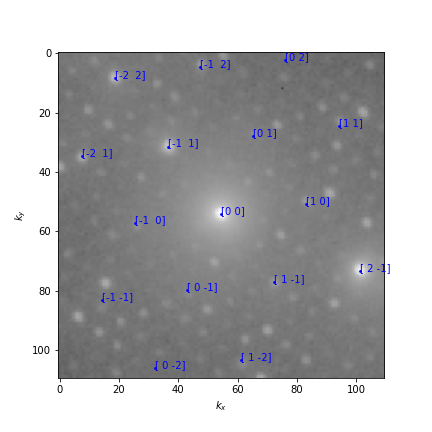

In [73]:
fig,ax=plt.subplots(figsize=(6,6))

vmin,vmax=np.nanmin(data),np.nanmax(data)
im=ax.imshow(data,cmap='gray', norm=colors.LogNorm(vmin=vmin, vmax=vmax))
# cb=plt.colorbar(im)
# cb.ax.set_title(r'$ I(k_x,k_y) $')
ax.set_xlabel(r'$k_x$')
ax.set_ylabel(r'$k_y$')
ax.set_aspect('equal')

# mask_ind=peak_local_max(np.log10(data),threshold_rel=0,min_distance=8)
# ax.scatter(mask_ind[:,1],mask_ind[:,0])
# ax.scatter(brag_peaks[:,1],brag_peaks[:,0])
# ax.scatter([66],[65],c='y')
# ax.scatter(com.k2[1],com.k2[0])
# ax.scatter(com.k1[1],com.k1[0])
# ax.scatter(com.k0[1],com.k0[0])

ax.scatter(com_ij[:,1],com_ij[:,0],color='b',s=3)
# [ax.text(com_ij[idx,1],com_ij[idx,0],f'{idx}',color='r') for idx in range(com_ij.shape[0])]
# ax.scatter(q.bragg_peaks[:,1],q.bragg_peaks[:,0],color='y',s=3)
# [ax.text(com_ij[idx,1],com_ij[idx,0],f'{idx}',color='b') for idx in range(com_ij.shape[0])]
[ax.text(com_ij[idx,1],com_ij[idx,0],f'{com.i_range[idx]}',color='b') for idx in range(com_ij.shape[0])]

In [68]:
com.generate_mask_ordered()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 16)

In [47]:
plt.imshow(com.generate_mask())

# plt.savefig('tmp.png')

In [ ]:
np.max()

In [33]:
z=np.arange(16).reshape((4,4))

In [35]:
z[[0,1,2],[2,0,1]]

array([2, 4, 9])

In [36]:
z

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [43]:
ii,jj=np.ogrid[-1:2,-1:2]

In [44]:
ii

array([[-1],
       [ 0],
       [ 1]])

In [45]:
jj

array([[-1,  0,  1]])

In [30]:
com.x_i

array([[  8,  18],
       [  5,  47],
       [  2,  76],
       [ 34,   7],
       [ 31,  36],
       [ 28,  65],
       [ 25,  94],
       [ 57,  25],
       [ 54,  54],
       [ 51,  83],
       [ 83,  14],
       [ 80,  43],
       [ 77,  72],
       [ 74, 101],
       [106,  32],
       [103,  61],
       [100,  90]])

In [12]:
brag_peaks=np.array([[ 55,  55],
       [ 59,  26],
       [ 73, 101],
       [ 86,  15],
       [ 32,  37],
       [ 36,   8],
       [ 78,  73],
       [ 51,  84],
       [ 28,  66],
       [ 24,  95],
       [ 82,  44],
       [  9,  19],
       [101,  91],
       [106, 62],
       [110,35],
       [5,49],
       [2,78]       ])

In [ ]:
(com.generate_com())

In [ ]:
average_dist_direction()

In [76]:
ave_dist=np.zeros((I.shape[0],I.shape[1],I.shape[2],3))
# b1_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
# b2_store=np.zeros((I.shape[0],I.shape[1],I.shape[2],2))
# for T_idx in [10]:
for T_idx in range(I.shape[0]):
    for i in range(I.shape[1]):
        print(f'{T_idx}:{i}',end='\r')
        for j in range(I.shape[2]):
            com=COM(data=I[T_idx,i,j])
            ave_dist[T_idx,i,j]=com.average_dist_direction(com_i)
np.save('strainmap_3.npy',ave_dist)

KeyboardInterrupt: 

In [7]:
with open('q_Txy_count_pts_outlier_sample_2_auto_bragg.pickle','rb') as f:
    rs=pickle.load(f)

In [73]:
with open('q_Txy_count_pts_outlier_sample_3_auto_bragg.pickle','rb') as f:
    rs=pickle.load(f)

In [74]:
ave_dist=np.load('strainmap.npy')

In [75]:
ave_dist.shape

(34, 200, 200, 3)

In [9]:
def generate_mask_line(x,y):
    '''
    x: (min,max)
    y: (min,max)
    '''
    i_idx,j_idx=np.meshgrid(np.arange(200),np.arange(200),indexing='ij')
    x_min,x_max=x
    y_min,y_max=y
    return (i_idx<((y_max-y_min)/(x_max-x_min)*j_idx+y_min))

In [13]:
mask=generate_mask_line((0,81), (178,199))

In [ ]:
data[:,:,0]

In [ ]:
T_idx_list=np.arange(34)
fig,axs=plt.subplots(T_idx_list.shape[0],6,figsize=(20,3*T_idx_list.shape[0]),tight_layout=True)
for T_idx in T_idx_list:
    data=ave_dist[T_idx,:,:]*np.where(mask[:,:,np.newaxis]==0,np.nan,1)
    ax=axs[T_idx]
    for i in range(3):
        im=ax[i].imshow(data[:,:,i])
        ax[i].set_title(f'$b_{i}$')
        axins=ax[i].inset_axes([1.05,0,.07,1],transform=ax[i].transAxes)
        cbar=plt.colorbar(im,cax=axins)

    im=ax[3].imshow(data.mean(axis=-1))
    axins=ax[3].inset_axes([1.05,0,.07,1],transform=ax[3].transAxes)
    cbar=plt.colorbar(im,cax=axins)
    im=ax[4].imshow(data[:,:,1]/data[:,:,0])
    axins=ax[4].inset_axes([1.05,0,.07,1],transform=ax[4].transAxes)
    cbar=plt.colorbar(im,cax=axins)
    im=ax[5].imshow(data[:,:,2]/data[:,:,0])
    axins=ax[5].inset_axes([1.05,0,.07,1],transform=ax[5].transAxes)
    cbar=plt.colorbar(im,cax=axins)

    ax[3].set_title(f'$(b_0+b_1+b_2)/3$')
    ax[4].set_title(f'$b_1/b_0$')
    ax[5].set_title(f'$b_2/b_0$')

    [ax.set_xlabel('y') for ax in ax]
    [ax.set_ylabel('x') for ax in ax]
    [ax.text(-0.2,1.05,f'T={T[T_idx]+273}(K)',transform=ax.transAxes) for ax in ax]
# plt.colorbar()

# fig.savefig('strainmap_3.png',dpi=300)


In [11]:
with open('count_pts_outlier.pickle','rb') as f:
    count_pts_outlier_sample_2=pickle.load(f)

In [12]:
ave_dist[10,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

29.137189943024797

In [13]:
ave_dist[10,:,:,1][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

28.48824727588973

In [14]:
ave_dist[10,:,:,2][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

29.167092653116764

In [15]:
(29.137189943024797+28.48824727588973+29.167092653116764)/3

28.9308432906771

In [62]:
count_pts_outlier_sample_2.ij.keys()

dict_keys([0.0, 3.0, 1.0, 2.0, -1])

In [66]:
ave_dist[1].shape

(200, 200, 3)

In [53]:
import scipy.stats

def t_test_confidence_interval(data, confidence_level=0.95):
    mean = np.mean(data)  # Compute the mean of the data
    sem = scipy.stats.sem(data)  # Compute the standard error of the mean
    deg_freedom = len(data) - 1  # Calculate the degrees of freedom
    t_value = scipy.stats.t.ppf((1 + confidence_level) / 2, deg_freedom)  # Calculate the t-value

    margin_of_error = t_value * sem  # Calculate the margin of error

    return margin_of_error,mean

    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    # lower_bound = mean - sem
    # upper_bound = mean + sem

    return lower_bound, upper_bound, mean


In [71]:
b_ave={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}
b_ave_err={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}
a_ave={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}
a_ave_err={key:np.zeros((T.shape[0],count_pts_outlier_sample_2.k)) for key in ['ave',0,1,2]}


for T_idx in range(T.shape[0]):
    b=[ave_dist[T_idx,:,:,idx] for idx in range(3)]
    a=[1/ave_dist[T_idx,:,:,idx] for idx in range(3)]

    for key in range(count_pts_outlier_sample_2.k):
        val=count_pts_outlier_sample_2.ij[key]
        b_list=[b[idx][tuple(np.array(val).T)] for idx in range(3)]
        a_list=[a[idx][tuple(np.array(val).T)] for idx in range(3)]

        for idx in range(3):
            b_ave_err[idx][T_idx,key],b_ave[idx][T_idx,key]=t_test_confidence_interval(b_list[idx])
            a_ave_err[idx][T_idx,key],a_ave[idx][T_idx,key]=t_test_confidence_interval(a_list[idx])

        b_ave_err['ave'][T_idx,key],b_ave['ave'][T_idx,key]=t_test_confidence_interval((b_list[0]+b_list[1]+b_list[2])/3)
        a_ave_err['ave'][T_idx,key],a_ave['ave'][T_idx,key]=t_test_confidence_interval((a_list[0]+a_list[1]+a_list[2])/3)

In [95]:
b_ave_all=b_ave['ave'].mean()
a_ave_all=a_ave['ave'].mean()
    
b_ave_pct={key:100*(b_ave[key]-b_ave_all)/b_ave_all for key in b_ave.keys()}
a_ave_pct={key:100*(a_ave[key]-a_ave_all)/a_ave_all for key in a_ave.keys()}

b_ave_err_pct={key:100*(b_ave_err[key])/b_ave_all for key in b_ave_err.keys()}
a_ave_err_pct={key:100*(a_ave_err[key])/a_ave_all for key in a_ave_err.keys()}

In [80]:
b_ave['ave'].mean()

28.985231600765026

In [72]:
ave_dist.mean()

28.985555190243517

In [85]:
(1/ave_dist).mean()

0.03450408807536791

In [16]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)]

array([29.17027238, 29.15999546, 29.14838742, ..., 29.19281173,
       29.21728035, 29.21456832])

In [17]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].mean()

29.15078160554829

In [21]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)].std()

0.08566614361096998

In [24]:
scipy.stats.sem(ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)])

0.0009405914393174859

In [35]:
scipy.stats.sem(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)])


9.791060689217113e-07

In [38]:
t_test_confidence_interval(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)])

(0.034265759404407514, 0.03426771761654536, 0.03426673851047644)

In [55]:
a_ave_err[0][0,3]

1.919251770454614e-06

In [46]:
a_ave_ub[0][0,3]

0.03426771761654536

In [47]:
a_ave[0][0,3]

0.03426673851047644

In [30]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[0]).T)]).mean()

0.03430469332317787

In [29]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[1]).T)]).mean()

0.034227301958065545

In [31]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[2]).T)]).mean()

0.03420556437796542

In [32]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)]).mean()

0.03426673851047644

In [27]:
(1/ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[2]).T)]).mean()

0.03420556437796542

In [20]:
ave_dist[0,:,:,0][tuple(np.array(count_pts_outlier_sample_2.ij[3]).T)].mean()

29.183049734727565

In [ ]:
count_pts_outlier_sample_2.ij[0]

In [102]:
a_ave_ub[0][0,0]

0.03430579854899645

In [103]:
a_ave[0][0,0]

0.03430469332317787

[(130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0)]

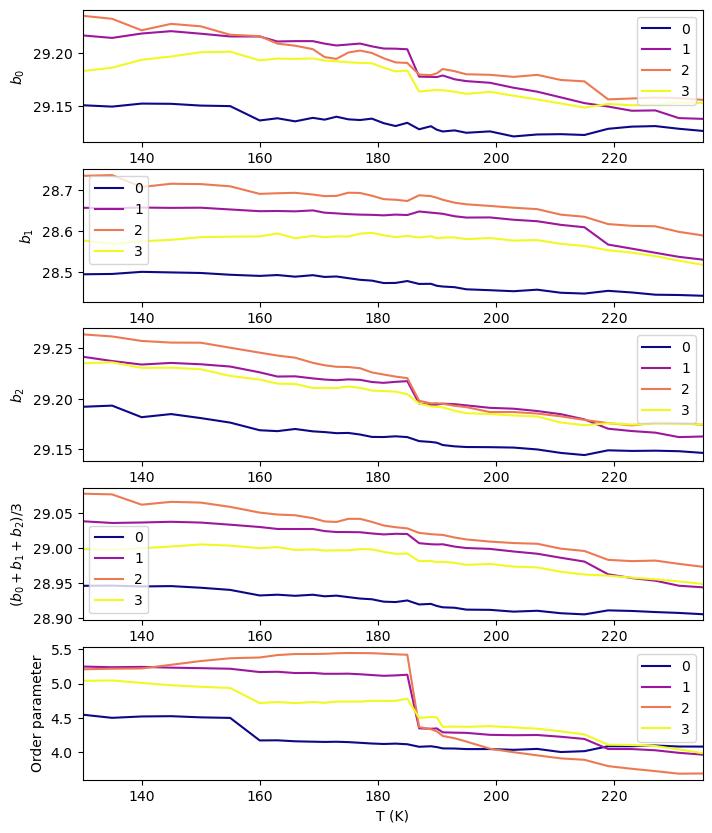

In [68]:
fig,axs=plt.subplots(5,1,figsize=(8,10))
cmap = plt.get_cmap('plasma', count_pts_outlier_sample_2.k)
color_list=[cmap(idx) for idx in range(count_pts_outlier_sample_2.k)]
ax=axs[0]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b0_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$b_0$')

ax=axs[1]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b1_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$b_1$')
ax=axs[2]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b2_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$b_2$')
ax=axs[3]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$(b_0+b_1+b_2)/3$')

ax=axs[4]
count_pts_outlier_sample_2.GMM_plot_single('mean', [0,1,2,3], errorbar=False,cond=None,ax=ax)
ax.set_ylabel('Order parameter')

[ax.set_xlim(T[0]+273,T[-1]+273) for ax in axs]


In [74]:
a_ave_all=a_ave['ave'].mean()

# a0_ave_pct=(a0_ave-a_ave_all)/a_ave_all
# a1_ave_pct=(a1_ave-a_ave_all)/a_ave_all
# a2_ave_pct=(a2_ave-a_ave_all)/a_ave_all
# a_ave_pct=(a_ave-a_ave_all)/a_ave_all

# a_ave_lb_pct={key:(a_ave_lb[key]-a_ave_all)/a_ave_all for key in a_ave_lb.keys()}
# a_ave_ub_pct={key:(a_ave_ub[key]-a_ave_all)/a_ave_all for key in a_ave_ub.keys()}
a_ave_pct={key:(a_ave[key]-a_ave_all)/a_ave_all for key in a_ave.keys()}

In [50]:
a_ave_ub[0][:,3]

array([0.03426772, 0.03426412, 0.03425534, 0.0342517 , 0.03424699,
       0.03424633, 0.03425603, 0.03425397, 0.03425439, 0.03425379,
       0.03425608, 0.03425697, 0.0342581 , 0.03425869, 0.03425902,
       0.034264  , 0.03426801, 0.03426717, 0.03429022, 0.03428894,
       0.03428835, 0.03428873, 0.03429032, 0.03429269, 0.0342904 ,
       0.03429477, 0.03429882, 0.03430325, 0.03430777, 0.03430381,
       0.03430525, 0.03430476, 0.03430231, 0.03430242])

In [51]:
a_ave_lb[0][:,3]

array([0.03426576, 0.03426212, 0.03425334, 0.03424967, 0.03424499,
       0.0342444 , 0.03425388, 0.03425193, 0.03425226, 0.03425181,
       0.03425409, 0.03425505, 0.0342561 , 0.03425673, 0.03425715,
       0.03426214, 0.03426614, 0.03426537, 0.03428859, 0.03428737,
       0.03428677, 0.03428716, 0.03428878, 0.03429117, 0.03428895,
       0.03429326, 0.03429738, 0.0343019 , 0.03430645, 0.03430244,
       0.03430391, 0.03430343, 0.03430108, 0.03430122])

In [60]:
color_list[i]

(0.050383, 0.029803, 0.527975, 1.0)

[(130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0),
 (130.0, 235.0)]

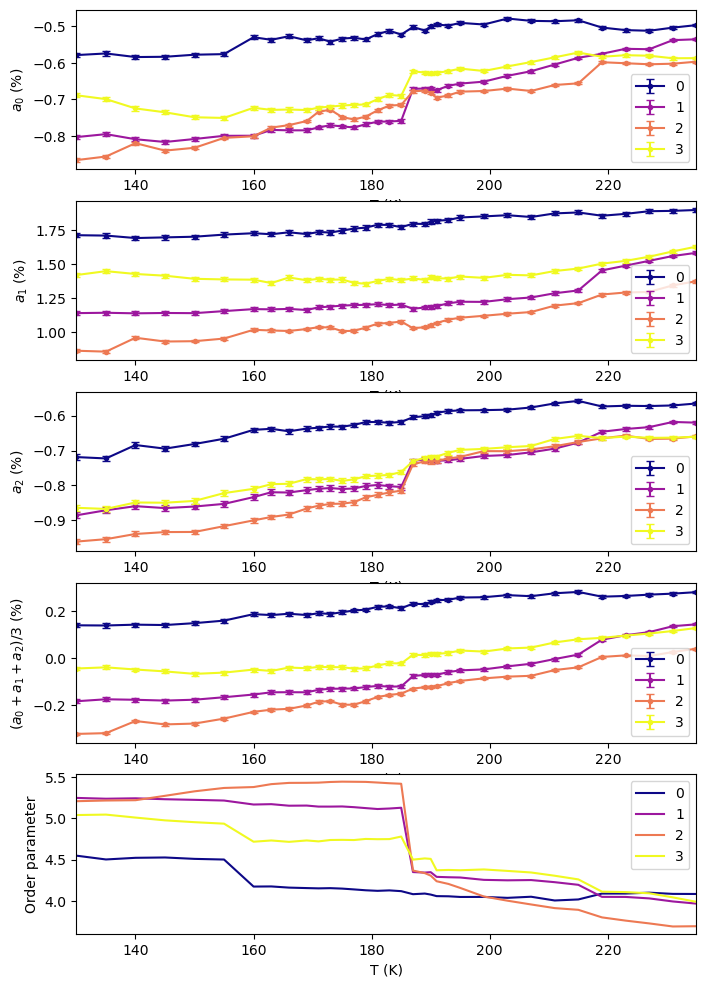

In [96]:
fig,axs=plt.subplots(5,1,figsize=(8,12))
cmap = plt.get_cmap('plasma', count_pts_outlier_sample_2.k)
color_list=[cmap(idx) for idx in range(count_pts_outlier_sample_2.k)]

for idx in range(3):
    ax=axs[idx]
    for i in range(count_pts_outlier_sample_2.k):
        ax.errorbar(T[:]+273,a_ave_pct[idx][:,i],a_ave_err_pct[idx][:,i],fmt='.-', capsize=3,color=color_list[i],label=str(i))
    ax.legend()
    ax.set_xlabel('T (K)')
    ax.set_ylabel(f'$a_{idx}$ (%)')

ax=axs[3]
for i in range(count_pts_outlier_sample_2.k):
        ax.errorbar(T[:]+273,a_ave_pct['ave'][:,i],a_ave_err_pct['ave'][:,i],fmt='.-', capsize=3,color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$(a_0+a_1+a_2)/3$ (%)')

ax=axs[4]
count_pts_outlier_sample_2.GMM_plot_single('mean', [0,1,2,3], errorbar=False,cond=None,ax=ax)
ax.set_ylabel('Order parameter')

[ax.set_xlim(T[0]+273,T[-1]+273) for ax in axs]


In [ ]:
fig,axs=plt.subplots(2,1,figsize=(8,6))
cmap = plt.get_cmap('plasma', count_pts_outlier_sample_2.k)
color_list=[cmap(idx) for idx in range(count_pts_outlier_sample_2.k)]
ax=axs[0]
for i in range(count_pts_outlier_sample_2.k):
    ax.plot(T[:]+273,b_ave[:,i],color=color_list[i],label=str(i))
ax.legend()
ax.set_xlabel('T (K)')
ax.set_ylabel('$(b_0+b_1+b_2)/3$')

ax=axs[1]
count_pts_outlier_sample_2.GMM_plot_single('mean', [0,1,2,3], errorbar=False,cond=None,ax=ax)


In [ ]:
count_pts_outlier_sample_2.ij[0]

In [ ]:
plt.imshow(ave_dist[10])
plt.colorbar()

In [ ]:
plt.imshow(ave_dist[0])
plt.colorbar()

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(com_i)

In [ ]:
distances, indices = nbrs.kneighbors(com_i)

In [ ]:
distances[:,1].mean()

In [ ]:
mask=com.generate_mask()

In [ ]:
plt.imshow(com.generate_mask())

In [ ]:
lbl=ndimage.label(mask)

In [ ]:
lbl[1]

In [ ]:
ndimage.center_of_mass(data,lbl[0],range(1,lbl[1]+1))

In [ ]:
zz=(com.generate_x_i())

In [ ]:
np.vstack(zz).shape

In [ ]:
b = np.array(([0,1,1,0],
              [0,1,0,0],
              [0,0,0,0],
              [0,0,1,1],
              [0,0,1,1]))

In [ ]:
lbl = ndimage.label(b)[0]

In [ ]:
lbl.min()

In [ ]:
ndimage.center_of_mass(b, lbl, [1,2])

# Test q_stat.py

In [5]:
import q_stat

In [18]:
import importlib

In [19]:
importlib.reload(q_stat)

<module 'q_stat' from '/home/hp364/STEM/4D/q_stat.py'>

In [24]:
q=q_stat.q_stat(8,x,y,workingdir,auto=True)

In [25]:
q.bragg_peaks

array([[  9.04186696,   7.00391219],
       [ 12.0566055 ,  37.03129829],
       [ 15.04883793,  67.04892583],
       [ 36.0747916 ,  21.05945364],
       [ 39.05195035,  51.02944103],
       [ 42.01751497,  80.99302932],
       [ 60.07122817,   5.04001398],
       [ 63.06577794,  35.02522321],
       [ 66.02312758,  64.98077854],
       [ 87.05427501,  19.01588601],
       [ 90.0319912 ,  49.00070042],
       [ 92.95940853,  78.9187019 ],
       [111.04071592,   2.98954627],
       [114.04449879,  32.98055288],
       [116.99380611,  62.9448012 ]])

{'mean': 3.5,
 'std': 0.6454972243679028,
 'length': 12,
 'bragg': array([[  9.04186696,   7.00391219],
        [ 12.0566055 ,  37.03129829],
        [ 15.04883793,  67.04892583],
        [ 36.0747916 ,  21.05945364],
        [ 39.05195035,  51.02944103],
        [ 42.01751497,  80.99302932],
        [ 60.07122817,   5.04001398],
        [ 63.06577794,  35.02522321],
        [ 66.02312758,  64.98077854],
        [ 87.05427501,  19.01588601],
        [ 90.0319912 ,  49.00070042],
        [ 92.95940853,  78.9187019 ],
        [111.04071592,   2.98954627],
        [114.04449879,  32.98055288],
        [116.99380611,  62.9448012 ]])}

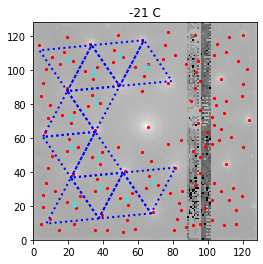

In [26]:
q.count_pts(visualization=True,remove_central_shell=True)

{'mean': 5.5, 'std': 0.9819805060619657, 'length': 14}

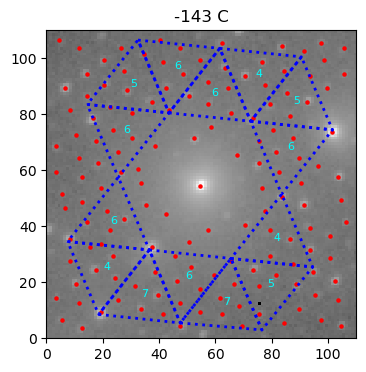

In [ ]:
q.count_pts(visualization=True,remove_central_shell=True)

{'mean': 5.285714285714286, 'std': 0.880630571852711, 'length': 14}

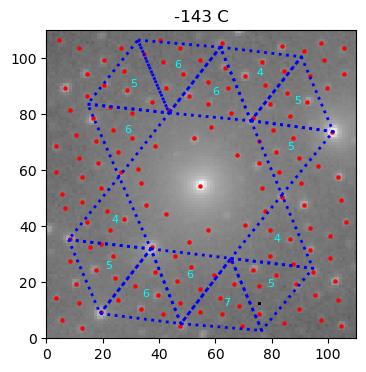

In [51]:
q.count_pts(visualization=True,remove_central_shell=True)

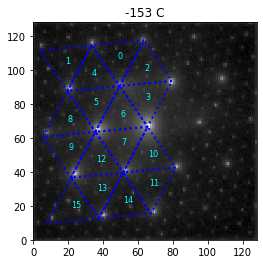

In [17]:
q.visualize_grid()

In [11]:
q.bragg_peaks

array([[  2.48214761,  75.98928762],
       [  4.98288227,  47.01882388],
       [  8.03065416,  18.05144528],
       [ 24.96293645,  94.00584816],
       [ 28.00485451,  64.99894569],
       [ 31.04338086,  36.04791086],
       [ 34.04940707,   7.03375405],
       [ 50.9823721 ,  83.00754228],
       [ 54.0151413 ,  54.02771137],
       [ 57.01501725,  25.02628856],
       [ 73.93890434, 101.03782948],
       [ 77.01633429,  72.00362023],
       [ 79.9963887 ,  43.00284029],
       [ 83.00922125,  14.01618683],
       [100.00187887,  89.99938982],
       [103.0406267 ,  61.02166321],
       [106.00057251,  31.99628045]])

In [ ]:
q.count_pts

# Calculate angle

In [6]:
T[:]+273

array([130, 135, 140, 145, 150, 155, 160, 163, 166, 169, 171, 173, 175,
       177, 179, 181, 183, 185, 187, 189, 190, 191, 193, 195, 199, 203,
       207, 211, 215, 219, 223, 227, 231, 235])

array([-13.42056345, -13.4246012 , -13.48551571, -13.44889202,
       -13.47867866, -13.46598606, -13.00135878, -13.01731892,
       -13.05142736, -13.02688287, -13.04313185, -13.00705412,
       -13.01632902, -13.01577918, -13.02759241, -13.04490411,
       -13.03829389, -13.01342666, -12.62832037, -12.63695724,
       -12.6694312 , -12.52586806, -12.52471668, -12.54321494,
       -12.55995215, -12.59701062, -12.58781674, -12.58271962,
       -12.58905529, -12.44201182, -12.4318714 , -12.42346346,
       -12.44166874, -12.49955803])

In [8]:
angle=[np.load(f'angle/cluster_{idx}_phi.npy') for idx in range(4)]
angle_err=[np.load(f'angle/cluster_{idx}_phi_error.npy') for idx in range(4)]

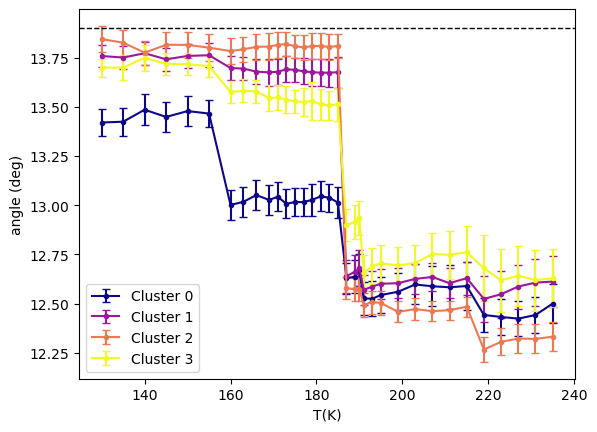

In [20]:
fig,ax=plt.subplots()
cmap = plt.get_cmap('plasma', 4)
color_list=[cmap(idx) for idx in range(4)]
for i in range(4):
    ax.errorbar(T[:]+273, np.abs(angle[i]), yerr=angle_err[i], fmt='.-', capsize=3, label=f'Cluster {i}',color=color_list[i])
ax.set_xlabel("T(K)")
ax.set_ylabel("angle (deg)")
ax.legend()
ax.axhline(y=13.9,lw=1,ls='dashed',color='k')

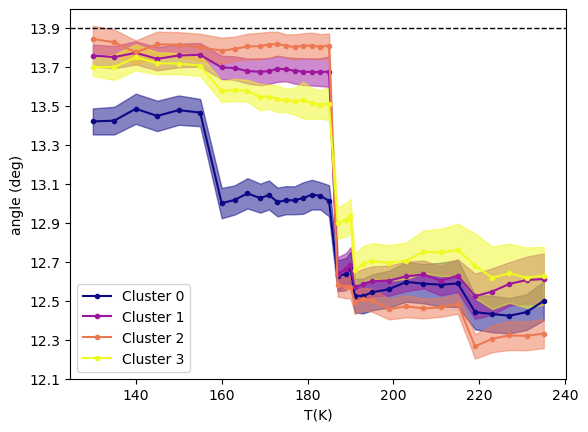

In [24]:
fig, ax = plt.subplots()
cmap = plt.get_cmap('plasma', 4)
color_list = [cmap(idx) for idx in range(4)]

for i in range(4):
    ax.plot(T[:]+273, np.abs(angle[i]), '.-', label=f'Cluster {i}', color=color_list[i])
    ax.fill_between(T[:]+273, np.abs(angle[i]) - angle_err[i], np.abs(angle[i]) + angle_err[i],
                    color=color_list[i], alpha=0.5)

ax.set_xlabel("T(K)")
ax.set_ylabel("angle (deg)")
ax.legend()
ax.axhline(y=13.9,lw=1,ls='dashed',color='k')
ax.set_yticks(np.arange(12.1,13.9,0.2))

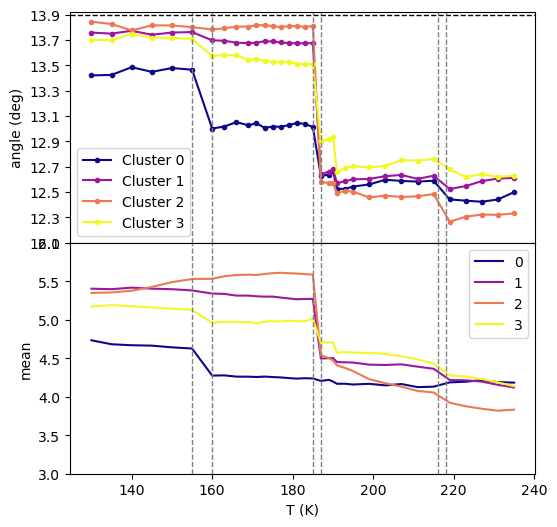

In [57]:
fig, axs = plt.subplots(2,1,figsize=(6,6),gridspec_kw=dict(hspace=0))
ax=axs[0]
cmap = plt.get_cmap('plasma', 4)
color_list = [cmap(idx) for idx in range(4)]

for i in range(4):
    ax.plot(T[:]+273, np.abs(angle[i]), '.-', label=f'Cluster {i}', color=color_list[i])
    # ax.fill_between(T[:]+273, np.abs(angle[i]) - angle_err[i], np.abs(angle[i]) + angle_err[i],
                    # color=color_list[i], alpha=0.5)

ax.set_xlabel("T(K)")
ax.set_ylabel("angle (deg)")
ax.legend()
ax.axhline(y=13.9,lw=1,ls='dashed',color='k')
ax.set_yticks(np.arange(12.1,13.9,0.2))
ax.set_xticklabels([])
# ax2=ax.twinx()
ax=axs[1]
count_pts_outlier_auto.GMM_plot_single('mean', [0,1,2,3],errorbar=False,cond=None,ax=ax,ylim=[3,6])

[ax.axvline(x=155,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=160,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=185,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=187,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=216,lw=1,ls='dashed',color='grey') for ax in axs]
[ax.axvline(x=218,lw=1,ls='dashed',color='grey') for ax in axs]


In [30]:
import pickle
from GMM import GMM_model

In [56]:
with open('count_pts_outlier_auto.pickle','rb') as f:
    count_pts_outlier_auto=pickle.load(f)